In [1]:
import glob
import os
import re
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import lightgbm as lgb

warnings.filterwarnings('ignore')

OSError: dlopen(/Users/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [2]:
train = pd.read_csv('../processed_data/train_v7.csv')
test = pd.read_csv('../processed_data/test_v7.csv')

In [3]:
train.head()

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,23ku_countall,area_num_countall,age_countall,floor_countall,max_floor_countall,layout_countall,room_num_countall,direction_countall,facilities_countall,contract_period_countall
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,2061,73,78,12112,2631,23661,47969,6150,819,1
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5,専用トイレ／\tシャワー／\t温水洗浄便座,...,2532,144,37,3959,2977,10177,47969,5557,106,1
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,1978,32,131,663,1273,23661,47969,17695,259,1
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,...,3542,7,202,10410,6165,5130,11019,17695,16,1
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,...,2387,49,141,12112,12311,3715,11019,17695,10,1


In [3]:
mdl = lgb.Booster(model_file='../mdl/1007_lgbm_high.txt')

NameError: name 'lgb' is not defined

In [64]:
# mdl.feature_name()

In [65]:
mdl.feature_importance()

array([1220, 1277,  364,   46,    4,   28,   12,    1,    2,    3,  142,
        564,  928,   48,   29,   28,   17,   11,   26,   18,   51,    7,
         16,   22,  213,  658,  604,    3,    6,  948,  692,   15,   10,
          5,   20,   20,   28,    4,    0,    0,    0,   17,   10,    7,
          0,   25,   34,   15,    0,    0,   23,    3,    0,    0,   16,
         19,    0,   21,    5,    0,    1,   14,    0,   15,    5,    0,
          9,    0,   24,   13,   31,   23,   29,   16,    0,   13,   16,
          0,    9,   12,   11,   20,   13,    0,    0,    6,    0,    0,
         55,    3,    9,   21,    3,  409,  749,  842,  460,  362,  163,
        221,  842,    0])

In [66]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = mdl.feature_name()
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(len(feature_importances))
feature_importances[24:]

102


,feature,importance
70,bc_2,31
14,car_parking,29
72,bc_4,29
5,D,28
15,bike_parking,28
...,...,...
83,kitchen_7,0
62,facilities_31,0
65,facilities_34,0
67,facilities_36,0


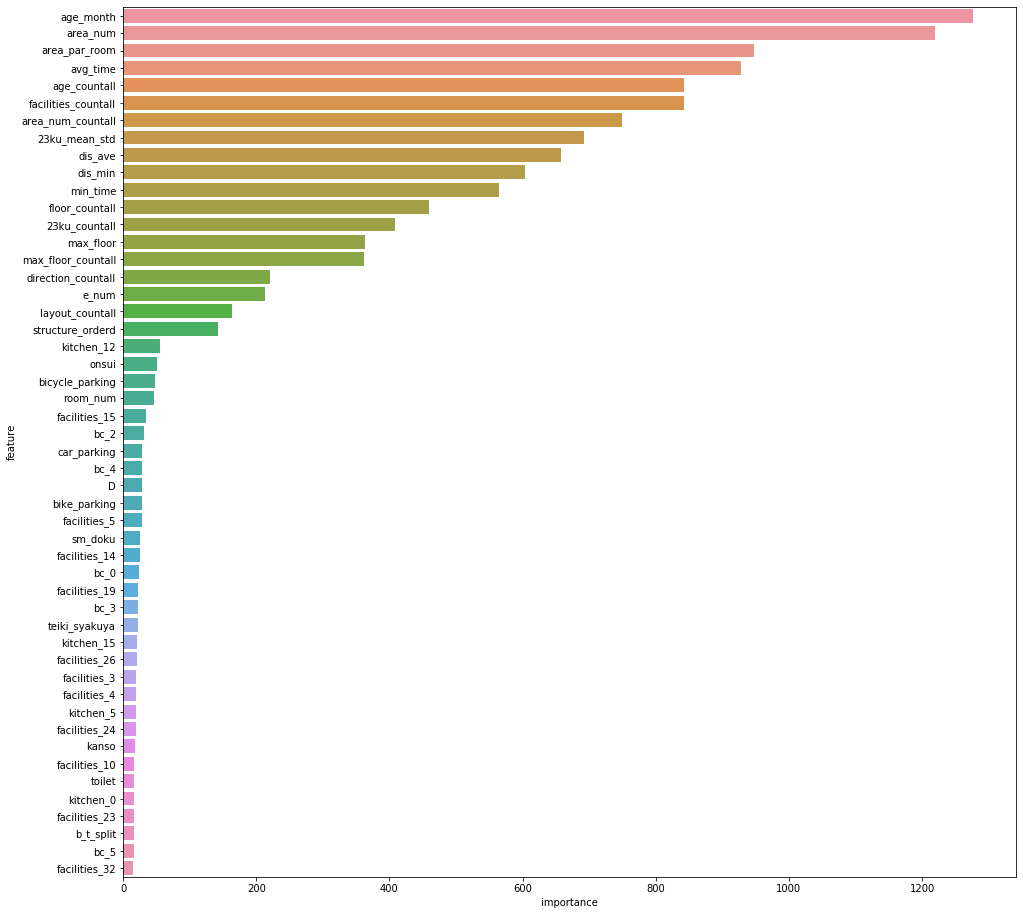

In [67]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.head(50), x='importance', y='feature')

In [35]:
list(feature_importances[feature_importances['importance']<600]['feature'])

['23ku_mean_std',
 'avg_time',
 'min_time',
 'max_floor',
 'dis_ave',
 '23ku_countall',
 'dis_min',
 'layout_countall',
 'max_floor_countall',
 'e_num',
 'structure_orderd',
 'direction_countall',
 'room_num',
 'car_parking',
 'onsui',
 'kitchen_12',
 'bicycle_parking',
 'sm_doku',
 'L',
 'bc_5',
 'facilities_5',
 'bc_0',
 'oidaki',
 'bike_parking',
 'facilities_14',
 'bc_2',
 'facilities_15',
 'kitchen_15',
 'facilities_0',
 'facilities_19',
 'facilities_26',
 'facilities_23',
 'bc_4',
 'bc_1',
 'facilities_24',
 'kanso',
 'facilities_20',
 'bc_3',
 'facilities_30',
 'b_t_split',
 'toilet',
 'facilities_16',
 'facilities_10',
 'kitchen_2',
 'kitchen_0',
 'bc_7',
 'K',
 'facilities_4',
 'kitchen_4',
 'facilities_3',
 'facilities_33',
 'kitchen_6',
 'teiki_syakuya',
 'kitchen_5',
 'kitchen_14',
 'D',
 'facilities_1',
 'facilities_18',
 'facilities_27',
 'facilities_11',
 'kitchen_3',
 'kitchen_1',
 'bath',
 'univ',
 'facilities_32',
 'facilities_35',
 'north',
 'school',
 'kitchen_13',


In [69]:
train = pd.read_csv('../processed_data/train_v9.csv')
use_col = train.columns

un_use_col = ['id','y','log_y','location', 'access', 'layout', 'age', 'direction', 'area','floor', 'bath_toilet', 'kitchen',
             'broadcast_com', 'facilities','parking', 'enviroment', 'structure', 'contract_period',
             'walk_time','23ku',
            #  'area_num_countall','floor_countall','room_num_countall','facilities_countall','age_countall','area_num_countall',
            ]

mdl = lgb.Booster(model_file='../mdl/1004_lgbm_log_4.txt')
feature_importances = pd.DataFrame()
feature_importances['feature'] = mdl.feature_name()
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

un_use_col += list(feature_importances[feature_importances['importance']<30]['feature'])
use_col = [c for c in use_col if c not in un_use_col]

In [72]:
mdl.predict(train.loc[5092:5093,use_col])

array([11.35230662, 12.85402653])

In [71]:
train.loc[5093,use_col]

area_num                217.29
age_month                   20
max_floor                    9
room_num                     2
structure_orderd             7
min_time                     8
avg_time                    10
bicycle_parking              0
onsui                        1
e_num                        6
dis_ave                594.333
dis_min                    417
area_par_room          108.645
23ku_mean_std          2.65149
facilities_15                1
bc_2                         0
kitchen_12                   1
23ku_countall             3073
area_num_countall            2
age_countall               134
floor_countall            1526
max_floor_countall        2200
layout_countall            326
direction_countall        8086
facilities_countall          3
Name: 5093, dtype: object

In [73]:
np.exp(12.85402653)

382325.08364647825